# Lista 4 

In [1]:
from matplotlib import pyplot as plt
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np

filename = 'StarWars60.wav'
# Extract data and sampling rate from file
data60, fs = sf.read(filename, dtype='float32')  

# Questão 1

## a)

In [97]:
len_data_10 = int(len(data60)/6)
data10 = data60[:len_data_10]
# sd.play(data10, fs)
write('StarWars10.wav', fs, data10)

## b)

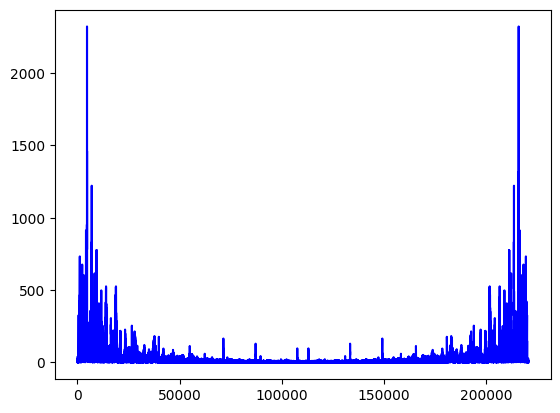

In [106]:

datahat = np.fft.fft(data10)
plt.plot(abs(datahat), 'b')

# 2 - Compressão com Fourrier


## a)

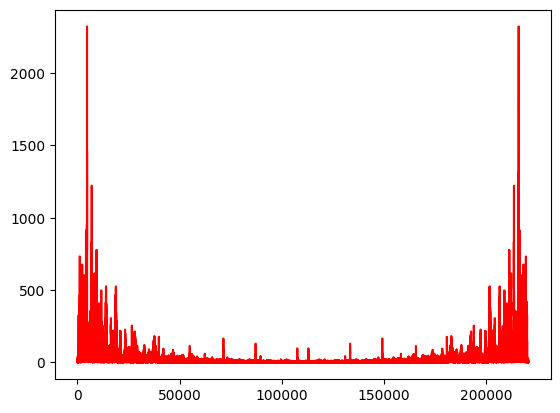

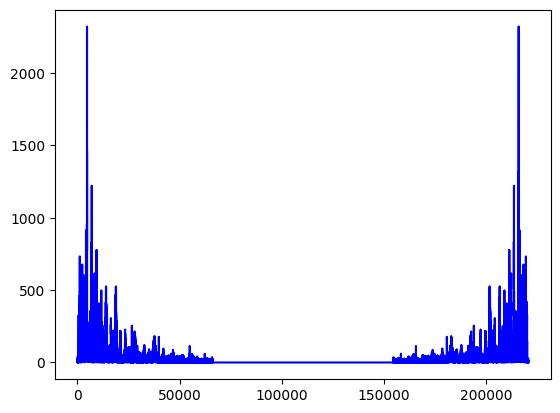

In [107]:
p=0.4

datahat = np.fft.fft(data10)

# preserv p% of the lowest frequencies
qtd = int(len(datahat)*p)
mean = len(datahat)//2
std = qtd//2
low = mean - std
high = mean + std
datahat[mean-std:mean+std] = 0


plt.figure()
datahatoriginal = np.fft.fft(data10)

plt.plot(abs(datahatoriginal), 'r')
plt.show()

plt.plot(abs(datahat), 'b')
plt.show()


b) Em termos qualitativos, a diferença do áudio compactado é que há uma perda de qualidade, apresentando ruídos ao fundo. O áudio compactado mantém apenas p=30% do sinal.

# 3

## a)

In [6]:
eco = 0.5
filename_coruja = 'Espirro.wav'

def echoed_audio(eco, filename_coruja):
    audio_audio, fs_audio = sf.read(filename_coruja, dtype='float32')
    audio_audio = audio_audio.flatten()
    echo_length = int(eco * fs_audio)
    echo_filter = np.zeros(echo_length+1)
    echo_filter[0] = 1
    echo_filter[-1] = 0.3
    audio_audio_echo = np.convolve(audio_audio, echo_filter, mode='same')
    sd.play(audio_audio_echo, fs_audio)

echoed_audio(eco, filename_coruja)

## b)

In [7]:
def reverberation_audio(eco_delay, filename, copies=10):
    audio_audio, fs_audio = sf.read(filename, dtype='float32')
    audio_audio = audio_audio.flatten()
    echo_length = int(eco_delay * fs_audio)
    echo_filter = np.zeros(copies*echo_length+1)
    echo_filter[0] = 1
    index = np.arange(echo_length, len(echo_filter), echo_length)
    # Use array broadcasting to assign 0.5 to the elements specified by index
    echo_filter[index] = 0.5
    echo_filter = echo_filter*np.exp(-np.arange(len(echo_filter))/(fs_audio/2))
    audio_audio_echo = np.convolve(audio_audio, echo_filter)
    sd.play(audio_audio_echo, fs_audio)

reverberation_audio(eco, 'laugh-man-02.wav')

# 4

## a)

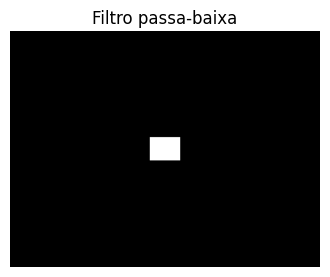

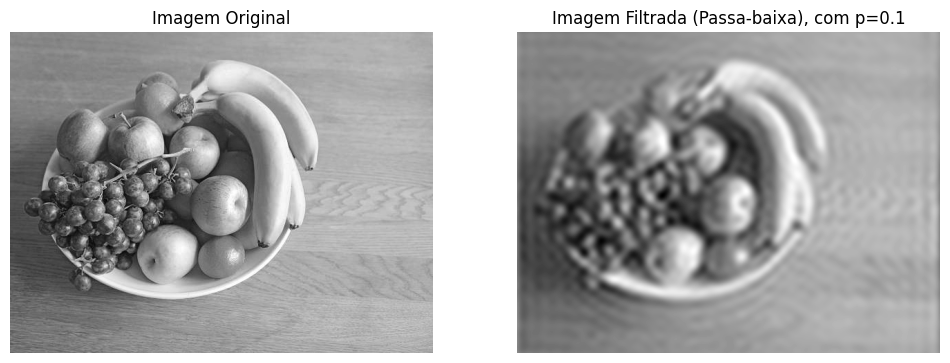

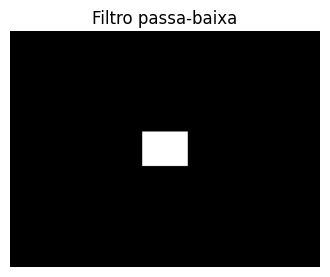

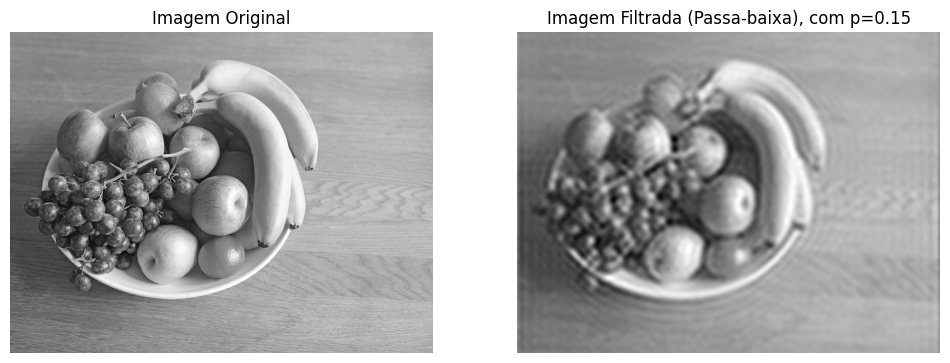

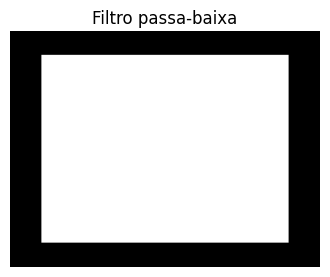

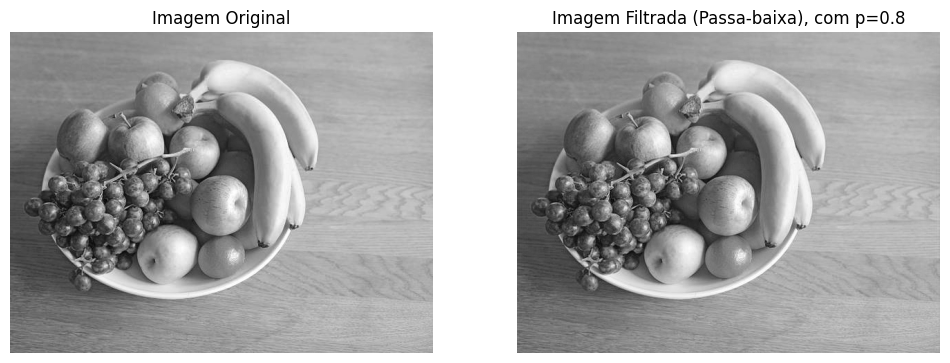

In [40]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('frutas.jpg')

# Converter a imagem em escala de cinza, se necessário
if len(image.shape) > 2:
    image_gray = np.mean(image, axis=2).astype(np.uint8)
else:
    image_gray = image.astype(np.uint8)

def apply_filter(image_gray, preserved=0.15):
    image_fft = np.fft.fft2(image_gray)

    # Centralizar a frequência zero
    image_fft_shifted = np.fft.fftshift(image_fft)

    # Determinar os limites para as frequências que serão preservadas no filtro passa-baixa
    rows, cols = image_fft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    r = int(preserved * crow)
    c = int(preserved * ccol)

    # Criar um filtro passa-baixa
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - r:crow + r, ccol - c:ccol + c] = 1

    # plot the mask in a 6x6 figure
    plt.figure(figsize=(4,4))
    plt.imshow(mask, cmap='gray')
    plt.title('Filtro passa-baixa')
    plt.axis('off')
    plt.show()

    image_fft_shifted = image_fft_shifted * mask

    image_filtered = np.fft.ifft2(np.fft.ifftshift(image_fft_shifted)).real
    return image_filtered

for p in [0.1, 0.15, 0.8]:
    keeeped = p
    image_filtered = apply_filter(image_gray, preserved=keeeped)
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_filtered, cmap='gray')
    plt.title(f'Imagem Filtrada (Passa-baixa), com p={keeeped}')
    plt.axis('off')

    plt.show()

## b)

Usando o filtro de passa-baixa (retendo frequências baixas), temos uma imagem suavizada. Quanto maior a fração de frequências baixas mantidas, mais parecida com a imagem original fica a imagem suavizada.

## c)


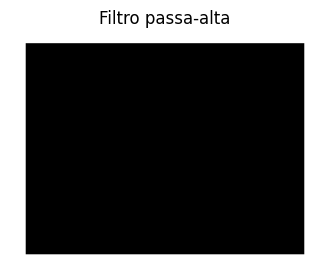

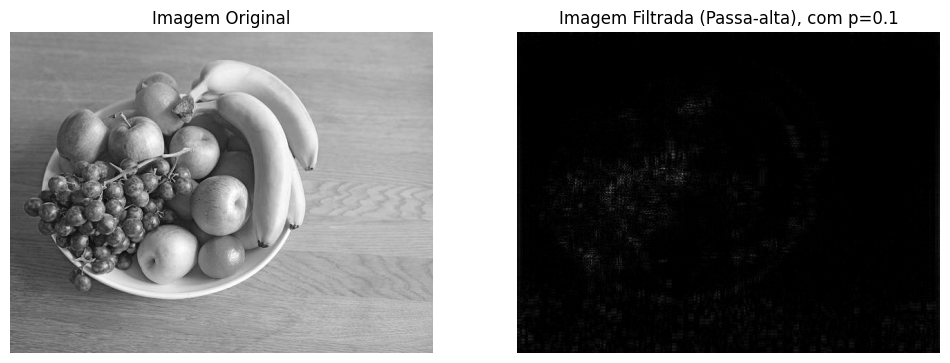

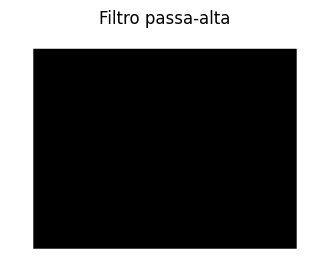

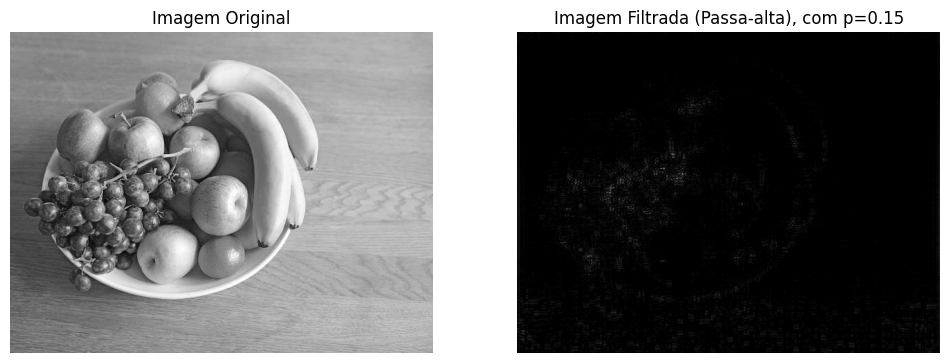

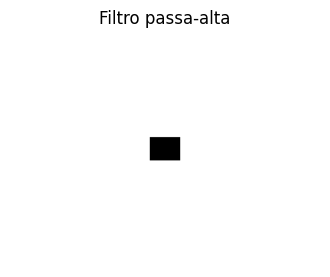

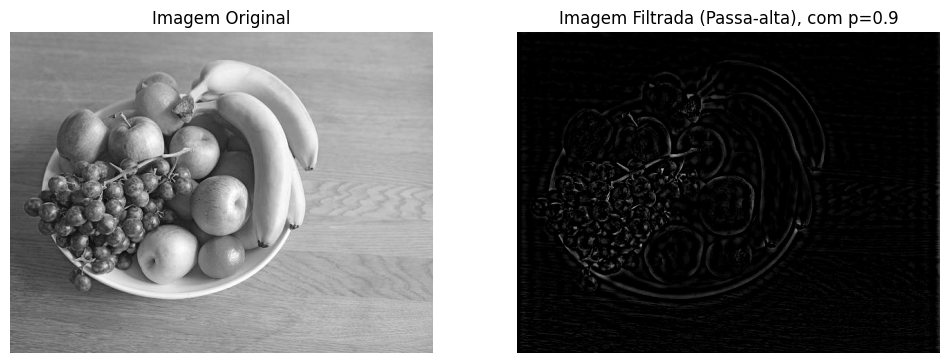

In [41]:
# filtro de passa alta
def apply_passa_alta_filter(image_gray, preserved=0.15):
    image_fft = np.fft.fft2(image_gray)

    # Centralizar a frequência zero
    image_fft_shifted = np.fft.fftshift(image_fft)

    # Determinar os limites para as frequências que serão preservadas no filtro passa-alta
    rows, cols = image_fft_shifted.shape
    crow, ccol = rows // 2, cols // 2
    r = int((1-preserved) * crow)
    c = int((1-preserved) * ccol)

    # Criar um filtro passa-alta
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - r:crow + r, ccol - c:ccol + c] = 0

    plt.figure(figsize=(4,4))
    plt.imshow(mask, cmap='gray')
    plt.title('Filtro passa-alta')
    plt.axis('off')
    plt.show()
     
    # Aplicar o filtro passa-alta
    image_fft_shifted = image_fft_shifted * mask

    # Realizar a inversa da transformada de Fourier
    image_filtered = np.fft.ifft2(np.fft.ifftshift(image_fft_shifted)).real
    return image_filtered

for p in [0.1, 0.15, 0.9]:
    keeeped = p
    image_filtered = apply_passa_alta_filter(image_gray, preserved=keeeped)
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_filtered, cmap='gray')
    plt.title(f'Imagem Filtrada (Passa-alta), com p={keeeped}')
    plt.axis('off')

    plt.show()


c) Efeito: quanto maior o valor de $p$, mais frequências altas são preservadas, o que produz uma imagem com bordas mais nítidas.

# 5


Uma convolução circular $T:\mathbb{R}^n \to \mathbb{R}^n$ é uma transformação linear $T(u)=h*u$ onde $h$ é um vetor de tamanho $n$ e $u$ é um vetor de tamanho $n$. A operação de convolução circular é definida como:

$$
(h*u)_i = \sum_{j=0}^{n-1} h_j u_{i-j \mod n}
$$

com o índice em $u$ invés de $h$ temos:

$$
(h*u)_i = \sum_{j=0}^{n-1} h_{i-j \mod n} u_j
$$

e a matriz de convolução circular $H$ é uma matriz $n \times n$ tal que $H_{ij} = h_{i-j \mod n}$.

$\begin{bmatrix}
h_0 & h_{n-1} & h_{n-2} & \cdots & h_1 \\
h_1 & h_0 & h_{n-1} & \cdots & h_2 \\
h_2 & h_1 & h_0 & \cdots & h_3 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
h_{n-1} & h_{n-2} & h_{n-3} & \cdots & h_0
\end{bmatrix}$

Tomando $\delta=(1,0,0,\ldots,0)\in\mathbb{R}^n$, temos que $H\delta = h$, pois:

$$
\begin{bmatrix}
h_0 & h_{n-1} & h_{n-2} & \cdots & h_1 \\
h_1 & h_0 & h_{n-1} & \cdots & h_2 \\
h_2 & h_1 & h_0 & \cdots & h_3 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
h_{n-1} & h_{n-2} & h_{n-3} & \cdots & h_0
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
=
\begin{bmatrix}
h_0 \\
h_1 \\
h_2 \\
\vdots \\
h_{n-1}
\end{bmatrix}
$$



# 6

Para momstar que um filtro $F:\mathbb{R}^n \to \mathbb{R}^n$ linear e invariante por translação é uma convolução circular, basta mostrar que $F$ é uma convolução circular com um vetor $h$.

Assim, sendo $F(au+bv)=aF(u)+bF(v)$ e $F(u)=v\to F(u(k-t))=v(k-t)$, temos que

$$ 
v(k-t)=F(u(k-t))=F(\sum_{j=0}^{n-1} u_j \delta_{k-j-t})=\sum_{j=0}^{n-1} u_j F(\delta_{k-j-t})=\sum_{j=0}^{n-1} u_j h_{k-j-t}
$$

ou seja, a convolução circular de $u$ com $h$ é $v(k-t)$, o que mostra que $F$ é uma convolução circular.


# 7 - Correção automática de gabaritos

16

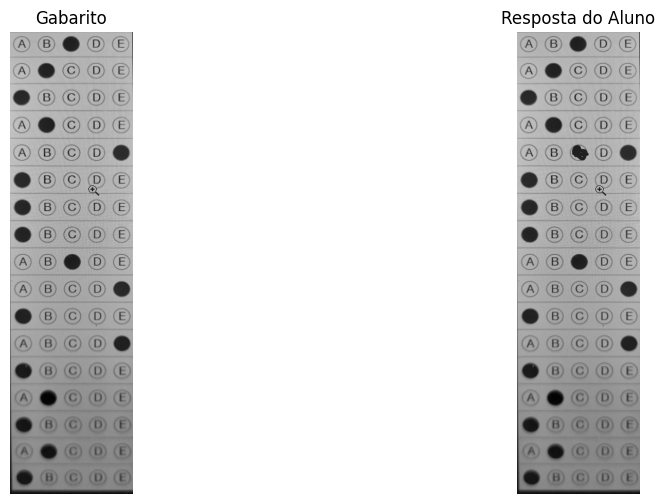

In [92]:
import cv2 as cv
def correcao_prova(gabarito, aluno):
    g = cv.imread(gabarito, cv.IMREAD_GRAYSCALE)
    r = cv.imread(aluno, cv.IMREAD_GRAYSCALE)

    # print images using pyplot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(g, cmap='gray')
    plt.title('Gabarito')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(r, cmap='gray')
    plt.title('Resposta do Aluno')
    plt.axis('off')


    g_fft = np.fft.fft2(g)
    r_fft = np.fft.fft2(r)

    # Centralizar a frequência zero
    g_fft_shifted = np.fft.fftshift(g_fft)
    r_fft_shifted = np.fft.fftshift(r_fft)

    # Determinar a transformação que leva r' em g'
    transformation = g_fft_shifted / r_fft_shifted

    r_fft_shifted_corrected = r_fft_shifted * transformation

    r_corrected = np.fft.ifft2(np.fft.ifftshift(r_fft_shifted_corrected)).real

    # Comparar a resposta do aluno com o gabarito utilizando subtração de cor em pixel
    # em uma grande área (bola)
    radius = 220
    correct = 0

    for i in range(0, g.shape[0], 2*radius):
        for j in range(0, g.shape[1], 2*radius):
            g_ball = g[i-radius:i+radius, j-radius:j+radius]
            r_ball = r_corrected[i-radius:i+radius, j-radius:j+radius]
            if np.mean(np.abs(g_ball - r_ball)) < 0.01:
                correct += 1

    return correct

correcao_prova( 'prof.jpeg', 'aluno.jpeg')
